<a href="https://colab.research.google.com/github/svetaepc/ds_py/blob/master/hw_log_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# https://drive.google.com/file/d/1umarpKe4RqzN8JEn-bHij9SnQhYZI2HU/view?usp=share_link

Mounted at /content/drive


In [ ]:
adult = '/content/drive/MyDrive/adult.csv'


df = pd.read_csv(adult)

df.sample(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
26198,42,Self-emp-not-inc,222978,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,45,United-States,<=50K
32502,21,?,262062,Some-college,10,Never-married,?,Own-child,White,Female,0,0,40,United-States,<=50K
30647,42,Private,87284,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,7298,0,35,United-States,>50K


In [ ]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [21]:
# создаем копию DataFrame и временно преобразуем все столбцы в строковый тип
df_string = df.astype(str)

# считаем количество знаков вопроса в DataFrame
question_marks_count = df_string.apply(lambda x: x.str.count('\?')).sum().sum()
question_marks_count

6465

Пропущенные значения обозначены вопросами - заменим их на null

In [22]:
df.replace(['?'], [None], inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Удалим все строки с пустыми ячейками

In [24]:
df.dropna(inplace=True)

In [25]:
df.reset_index(inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            45222 non-null  int64 
 1   age              45222 non-null  int64 
 2   workclass        45222 non-null  object
 3   fnlwgt           45222 non-null  int64 
 4   education        45222 non-null  object
 5   educational-num  45222 non-null  int64 
 6   marital-status   45222 non-null  object
 7   occupation       45222 non-null  object
 8   relationship     45222 non-null  object
 9   race             45222 non-null  object
 10  gender           45222 non-null  object
 11  capital-gain     45222 non-null  int64 
 12  capital-loss     45222 non-null  int64 
 13  hours-per-week   45222 non-null  int64 
 14  native-country   45222 non-null  object
 15  income           45222 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


Потеряли около 3.5к записей, что менее 10%.

In [27]:
df.describe()

,index,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,24433.151563,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,14092.966862,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,0.000000,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,12206.250000,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,24470.000000,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,36629.750000,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,48841.000000,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [28]:
df.head(10)

,index,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
5,7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
6,8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
7,9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
8,10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
9,11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


Разобьем данные на X и y

In [29]:
X = df.loc[:, df.columns != 'income']

In [30]:
y = df[df.columns[-1]]

Посмотрим, какие значения принимает целевой атрибут

In [32]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

Заменим в целевом атрибуте '>50K' на 1 и '<=50K' на 0

In [33]:
y.replace('>50K', 1, inplace=True)
y.replace('<=50K', 0, inplace=True)

Разделим выборку на тренировочную и валидационную.

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)

Разделим признаки на числовые и категориальные

In [35]:
num_columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
cat_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

Получим список значений для всех категорий, для OneHotEncoder-а

In [36]:
def get_cat_categories(df, cat_columns):
    categories = []
    for column in cat_columns:
        categories.append(list(df[column].unique()))    
    return categories

In [37]:
categories = get_cat_categories(df, cat_columns)

Категориальные признаки обрабатываем OneHotEncoder-ом, численные пропускаем через StandardScaler

In [38]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(categories=categories), cat_columns),
        ('num', StandardScaler(), num_columns)
    ],
    sparse_threshold=0,
    remainder='drop'
)

Соберем пайплайн

In [39]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

А теперь все это запихнем в гридсерч

In [40]:
grid_params = {
    'classifier__C': np.logspace(-3, 3, 7),
    'classifier__penalty': ['l1', 'l2']
}

In [41]:
grid = GridSearchCV(clf, param_grid=grid_params, n_jobs=-1, cv=10)

In [42]:
grid.fit(X, y)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  Fi

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(sparse_threshold=0,
                                                          transformers=[('cat',
                                                                         OneHotEncoder(categories=[['Private',
                                                                                                    'Local-gov',
                                                                                                    'Self-emp-not-inc',
                                                                                                    'Federal-gov',
                                                                                                    'State-gov',
                                                                                                    'Self-emp-inc',
                                                                                                    'Without-pay'],
                                                                                                   ['11th',
                                                                                                    'HS-grad',
                                                                                                    'Assoc-acdm',
                                                                                                    'Some-college',
                                                                                                    '10th',
                                                                                                    'Prof-school',
                                                                                                    '7th-8th',
                                                                                                    'Bachelors',
                                                                                                    'Masters',
                                                                                                    '5th-6th...
                                                                          'marital-status',
                                                                          'occupation',
                                                                          'relationship',
                                                                          'race',
                                                                          'gender',
                                                                          'native-country']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'fnlwgt',
                                                                          'educational-num',
                                                                          'capital-gain',
                                                                          'capital-loss',
                                                                          'hours-per-week'])])),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'classifier__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'classifier__penalty': ['l1', 'l2']})

In [43]:
grid.best_score_

0.8484588133402005

In [44]:
grid.best_params_

{'classifier__C': 1.0, 'classifier__penalty': 'l2'}

In [45]:
model = grid.best_estimator_

Посмотрим на остатки

In [46]:
model.named_steps['classifier'].intercept_

array([-1.55835414])

Пробуем на валидационной выборке

In [55]:
y_pred = model.predict(X_val)

In [56]:
model.score(X_val, y_val)

0.8527363184079602

Даже немного лучше, чем на трейне

Нарисуем ROC AUC

In [57]:
def plt_roc_auc(title, fpr_train, tpr_train, roc_auc_train, fpr_test, tpr_test, roc_auc_test):
    plt.figure(figsize=(8, 8))
    plt.plot(fpr_train, tpr_train, label=f'Train ROC AUC {roc_auc_train}')
    plt.plot(fpr_test, tpr_test, label=f'Test ROC AUC {roc_auc_test}')
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()    

In [58]:
y_pred_train = model.predict(X_train)
y_prob_train = model.predict_proba(X_train)[:, 1]
y_prob = model.predict_proba(X_val)[:, 1]

In [59]:
fpr_train, tpr_train, _ = roc_curve(y_train, y_prob_train)
fpr_test, tpr_test, _ = roc_curve(y_val, y_prob)
roc_auc_train = roc_auc_score(y_train, y_prob_train)
roc_auc_test = roc_auc_score(y_val, y_prob)

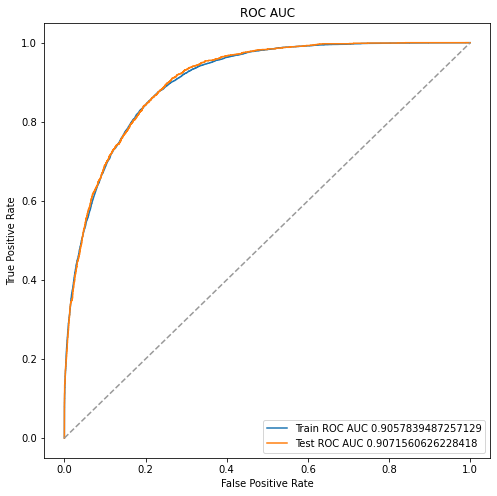

In [60]:
plt_roc_auc('ROC AUC', fpr_train, tpr_train, roc_auc_train, fpr_test, tpr_test, roc_auc_test)